This notebook is a Job search tool to findout the top 10 Data scientist jobs per city. 

Steps:
- Removed empty reviews rows
- Changed the type of reviews column from float to int
- Removed leading/trailing spaces and zip code from the location column
- Filtered the rows by "Data Scientist Text" from position
- Removed rows that have string/substring Senior OR online OR sr in position column and University in company column
- Finally, the data is grouped by Cities and sorted by number of reviews


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
DSData = pd.DataFrame()
fields = ['position', 'company','reviews','location']
DSData = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\git\ThinkfulExercises\Data Scientist Job Market in the US.csv",usecols=fields)

In [135]:
print(DSData.head())

                                            position             company  \
0                               Development Director             ALS TDI   
1  An Ostentatiously-Excitable Principal Research...  The Hexagon Lavish   
2                                     Data Scientist      Xpert Staffing   
3                                       Data Analyst      Operation HOPE   
4  Assistant Professor -TT - Signal Processing & ...    Emory University   

   reviews            location  
0      NaN  Atlanta, GA 30301   
1      NaN         Atlanta, GA  
2      NaN         Atlanta, GA  
3     44.0  Atlanta, GA 30303   
4    550.0         Atlanta, GA  


In [167]:
DSData = DSData.dropna(axis=0,how='any',subset=['reviews'])
DSData['reviews'] = DSData['reviews'].astype(int)
print(DSData.head())

                                            position             company  \
3                                       Data Analyst      Operation HOPE   
4  Assistant Professor -TT - Signal Processing & ...    Emory University   
5                        Manager of Data Engineering  McKinsey & Company   
6       Product Specialist - Periscope, New Ventures  McKinsey & Company   
7  Junior to Mid-level Engineer, Geologist or Env...                Wood   

   reviews            location  
3       44  Atlanta, GA 30303   
4      550         Atlanta, GA  
5      385  Atlanta, GA 30318   
6      385  Atlanta, GA 30318   
7      899         Atlanta, GA  


In [168]:
DSData['location'] = DSData['location'].str.replace("\d+","")
DSData['location'] = DSData['location'].str.strip()
#DSData = DSData[DSData['location'].str.replace("\d+","")]
print(DSData.head(),len(DSData))

                                            position             company  \
3                                       Data Analyst      Operation HOPE   
4  Assistant Professor -TT - Signal Processing & ...    Emory University   
5                        Manager of Data Engineering  McKinsey & Company   
6       Product Specialist - Periscope, New Ventures  McKinsey & Company   
7  Junior to Mid-level Engineer, Geologist or Env...                Wood   

   reviews     location  
3       44  Atlanta, GA  
4      550  Atlanta, GA  
5      385  Atlanta, GA  
6      385  Atlanta, GA  
7      899  Atlanta, GA   5326


In [169]:
DSData = DSData[DSData['position'].str.contains("Data Scientist")]
#DSData = DSData[~DSData['position'].str.contains('Senior|online|Sr')]
DSData = DSData[~DSData['company'].str.contains('university')]
print(DSData)
print("Dataframe count: ",len(DSData))

                                               position  \
9     Senior Associate - Cognitive Data Scientist Na...   
12                     Senior Associate, Data Scientist   
15                                       Data Scientist   
22                                       Data Scientist   
24                     Data Scientist, Keying & Linking   
27                                 Data Scientist - ICL   
28                               Data Scientist, Online   
29    Data Scientist - CONSULTANT Level - ORLANDO FL...   
30                                Senior Data Scientist   
31    Business Intelligence Data Scientist - Supply ...   
34                                       Data Scientist   
35                                       Data Scientist   
36                                       Data Scientist   
41                                Senior Data Scientist   
42                  Manager - Data Scientist ! Orlando!   
44                                  Lead Data Scientist 

Text(0, 0.5, 'Count')

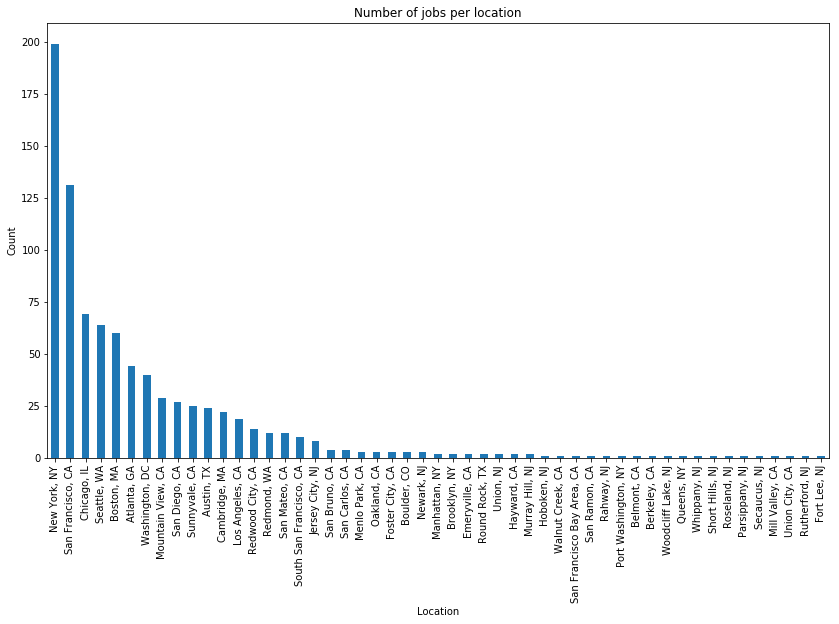

In [170]:
ax = DSData['location'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of jobs per location")
ax.set_xlabel("Location")
ax.set_ylabel("Count")

In [171]:
#print(DSData)
#DSData.sort_values(['reviews'],ascending=False)
#.groupby('location').head(3)
DSData = DSData[~DSData['position'].str.contains('Senior|online|Sr')]
DSData = DSData.sort_values(['location','reviews'],ascending=False).groupby('location').head(5)
DSData.sort_values(['location'])
#print(DSData)
#DSData.sort_values(['location','reviews'],ascending=False)

,position,company,reviews,location
29,Data Scientist - CONSULTANT Level - ORLANDO FL...,Capgemini,5720,"Atlanta, GA"
28,"Data Scientist, Online",The Home Depot,38844,"Atlanta, GA"
237,Data Scientist III,Honeywell,6121,"Atlanta, GA"
232,Advanced Data Scientist,Honeywell,6121,"Atlanta, GA"
233,Data Scientist,The Coca-Cola Company,7236,"Atlanta, GA"
483,"Junior Data Scientist, Dell HR - Diversity & I...",DELL,8380,"Austin, TX"
391,Software Development Principal Engineer – Data...,DELL,8380,"Austin, TX"
311,Data Scientist,IBM,22252,"Austin, TX"
449,Data Scientist-ISD,Walmart,148085,"Austin, TX"
490,"Junior Data Scientist, Dell HR - Talent Acquis...",DELL,8380,"Austin, TX"


In [172]:
print(DSData[['location','reviews']])

                     location  reviews
4328       Woodcliff Lake, NJ     1958
1951           Washington, DC     4494
1962           Washington, DC     4494
1983           Washington, DC     4494
1997           Washington, DC     4494
1917           Washington, DC     2380
6646         Walnut Creek, CA       29
3516                Union, NJ     4677
5899           Union City, CA        7
6754            Sunnyvale, CA    33275
6926            Sunnyvale, CA    33275
6951            Sunnyvale, CA    33275
6957            Sunnyvale, CA    33275
6936            Sunnyvale, CA    25907
5876  South San Francisco, CA      921
5868  South San Francisco, CA      678
6552  South San Francisco, CA      678
6562  South San Francisco, CA      678
6597  South San Francisco, CA      678
4311          Short Hills, NJ      150
4215             Secaucus, NJ     2828
4978              Seattle, WA    25895
4979              Seattle, WA    25895
4980              Seattle, WA    25895
5009              Seattle